In [1]:
import pandas as pd

In [2]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [3]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [7]:
ufo.dtypes
# Time 컬럼이 object이다 (문자열이다)

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [11]:
# 시간 값만 숫자로 가져와보자
ufo.Time.str.slice(-5, -3).astype(int).head()

# 별로다.

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int64

In [12]:
# pandas의 Datetime으로 변환해보자
ufo['Time'] = pd.to_datetime(ufo.Time)

In [13]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [16]:
ufo.dtypes

# 데이터 타입이 datetime으로 변경되었다

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [17]:
# 타입을 변경할 때, 포맷을 정의해줄 수도 있다

In [19]:
# datetime 관련 속성은 dt 이다
ufo.Time.dt.hour.head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int64

In [21]:
ufo.Time.dt.weekday_name.head()

0     Sunday
1     Monday
2     Sunday
3     Monday
4    Tuesday
Name: Time, dtype: object

In [22]:
ufo.Time.dt.dayofyear.head()

0    152
1    181
2     46
3    152
4    108
Name: Time, dtype: int64

In [25]:
# to_datetime을 자세히 살펴보자
ts = pd.to_datetime('1/1/1999')
ts

Timestamp('1999-01-01 00:00:00')

In [26]:
type(ts)

pandas.tslib.Timestamp

In [28]:
ufo.loc[ufo.Time >= ts, :]

,City,Colors Reported,Shape Reported,State,Time
12832,Loma Rica,NaN,LIGHT,CA,1999-01-01 02:30:00
12833,Bauxite,NaN,NaN,AR,1999-01-01 03:00:00
12834,Florence,NaN,CYLINDER,SC,1999-01-01 14:00:00
12835,Lake Henshaw,NaN,CIGAR,CA,1999-01-01 15:00:00
12836,Wilmington Island,NaN,LIGHT,GA,1999-01-01 17:15:00
12837,DeWitt,NaN,LIGHT,AR,1999-01-01 18:00:00
12838,Bainbridge Island,NaN,NaN,WA,1999-01-01 19:12:00
12839,Camano Island,NaN,FIREBALL,WA,1999-01-01 19:30:00
12840,Cheaha Mountain,NaN,TRIANGLE,AL,1999-01-01 21:00:00
12841,Coyoty Canyon,NaN,DISK,NM,1999-01-01 21:00:00


In [30]:
ufo.Time.max()

Timestamp('2000-12-31 23:59:00')

In [32]:
ufo.Time.max() - ufo.Time.min()

# Timedelta 객체는 시간차를 보여준다

Timedelta('25781 days 01:59:00')

In [33]:
(ufo.Time.max() - ufo.Time.min()).days

25781

In [34]:
%matplotlib inline

In [35]:
ufo['Year'] = ufo.Time.dt.year

In [36]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933


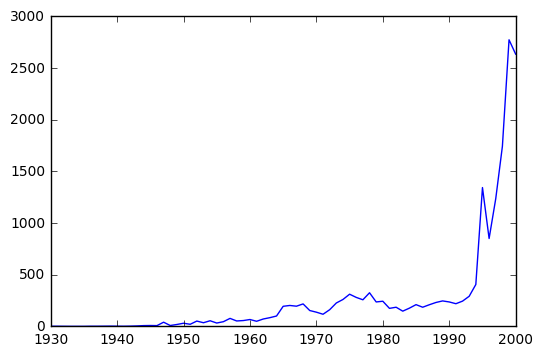

In [38]:
# 연도별로 얼마나 많이 발견됐을까?
ufo.Year.value_counts().sort_index().plot()